In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

f = pd.read_csv("Waitlist___Gender,_Age_by_Candidates.csv")
f.rename(columns={
    'Unnamed: 0': 'State',
    'Unnamed: 1': 'Age_Group',
    'Unnamed: 2': 'Gender'
}, inplace=True)


f.drop(columns=['Unnamed: 3'], inplace=True)
f.drop(columns=['Kidney / Pancreas', 'Heart / Lung', 'Intestine', 'Abdominal Wall', 'VCA - head and neck', 'VCA - upper limb','VCA - uterus'], inplace=True)


f['Liver'].fillna("NNN", inplace=True)
f = f[f['Liver'].str.contains("NNN")==False]
f = f[f['State'].str.contains("Puerto Rico")==False]
f = f[f['State'].str.contains("District of Columbia")==False]


f = f[f['Gender'].str.contains("All Genders")==False]
f = f[f['Age_Group'].str.contains("All Ages")==False]

f






C:\Users\allyh\AppData\Local\Temp\ipykernel_16400\1461469146.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  f['Liver'].fillna("NNN", inplace=True)


,State,Age_Group,Gender,All Organs,Kidney,Liver,Pancreas,Heart,Lung
31,Alabama,< 1 Year,Female,1,0,0,0.0,1,0.0
33,Alabama,1-5 Years,Male,5,2,2,0.0,1,0.0
34,Alabama,1-5 Years,Female,8,2,3,0.0,3,0.0
36,Alabama,6-10 Years,Male,1,0,0,0.0,1,0.0
37,Alabama,6-10 Years,Female,1,1,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
1155,Wisconsin,35-49 Years,Female,126,98,17,6.0,0,0.0
1157,Wisconsin,50-64 Years,Male,447,346,58,3.0,23,4.0
1158,Wisconsin,50-64 Years,Female,225,191,21,0.0,6,1.0
1160,Wisconsin,65 +,Male,264,221,29,1.0,10,3.0


Column 'Unnamed: 3' was removed due to it being completely empty.

Columns 'Kidney / Pancreas', 'Heart / Lung', 'Intestine', 'Abdominal Wall', 'VCA - head and neck',
         'VCA - upper limb','VCA - uterus' were removed due to either being combinations of other colums (fx. Kidney / Pancreas vs. Kidney, Pancreas).

Empty rows were removed.

Rows containing information related to Puerto Rico and District of Columbia were removed because we are looking at states only
    
Rows containing 'all genders' or 'all ages' were removed to avoid double counting.

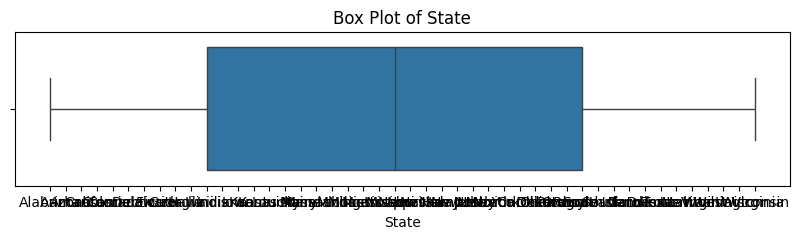

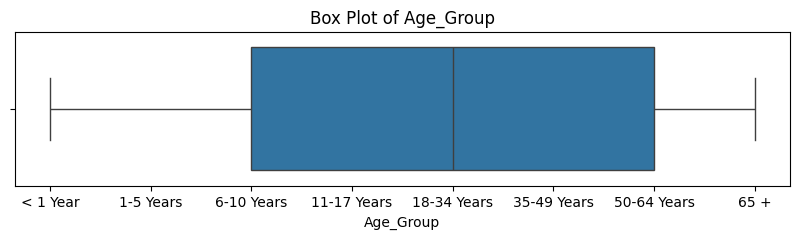

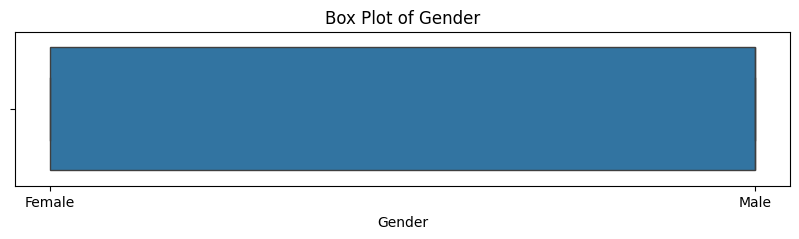

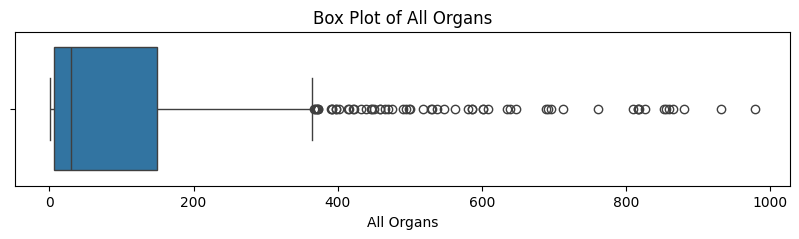

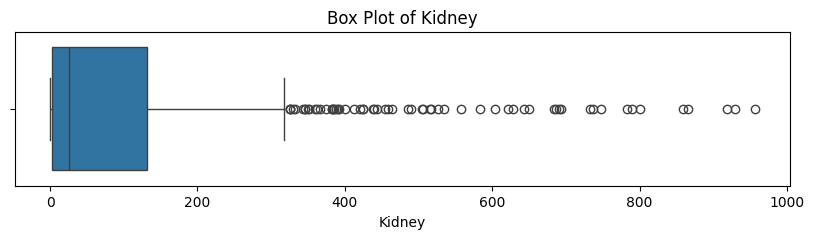

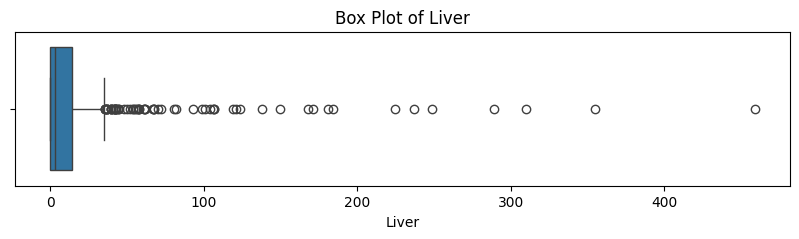

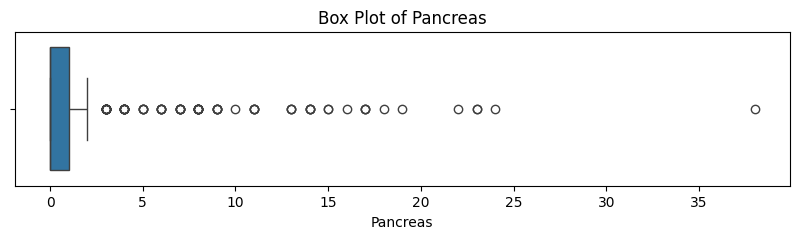

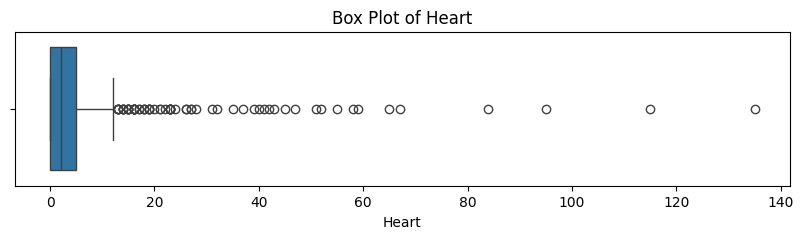

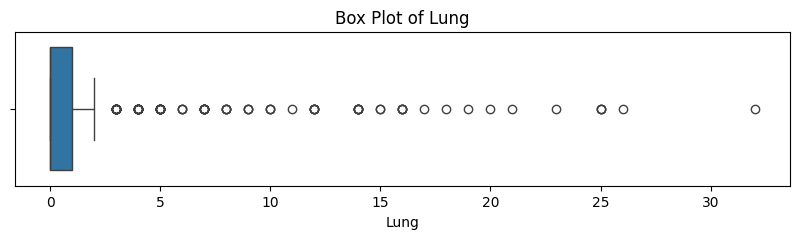

In [7]:
for col in f:
    plt.figure(figsize=(10, 2)) 
    sns.boxplot(x=f[col])
    plt.title(f'Box Plot of {col}')  
    plt.show()

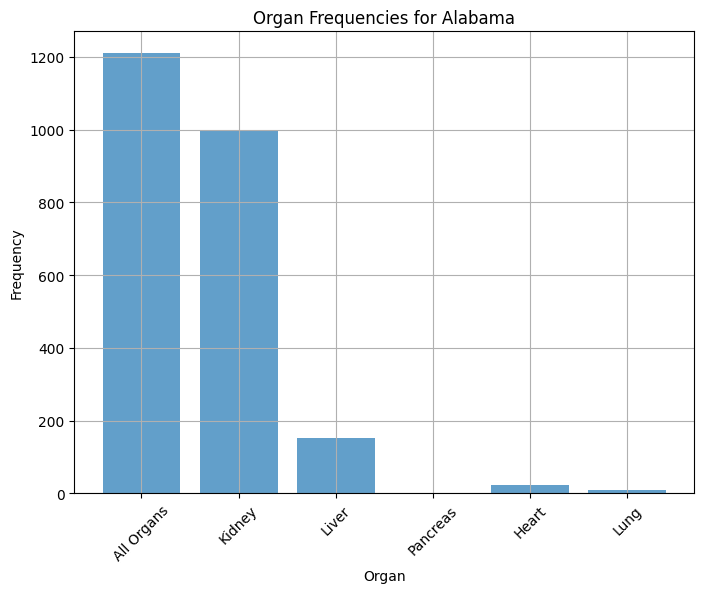

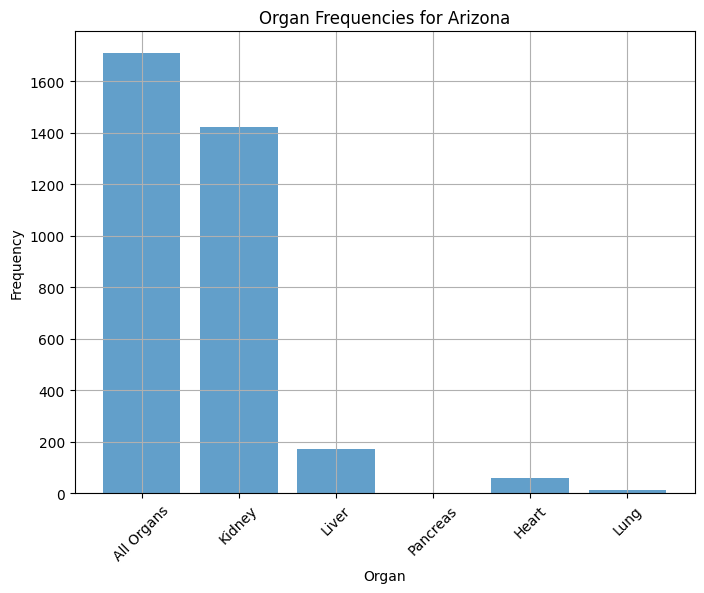

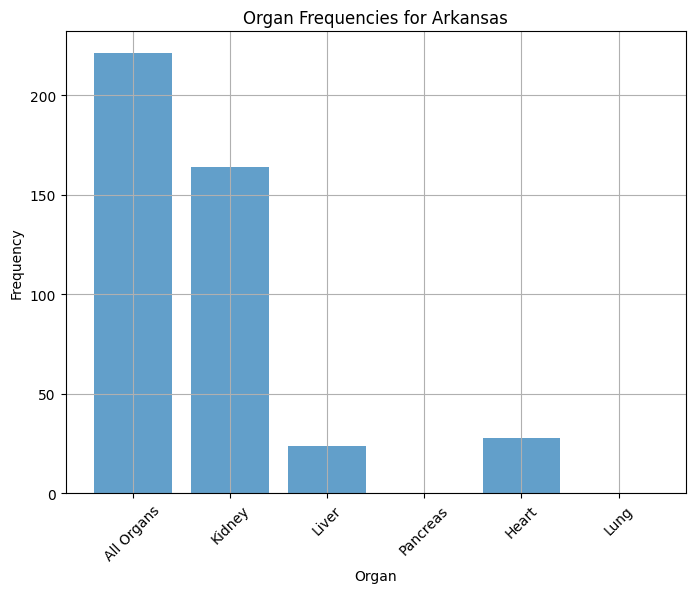

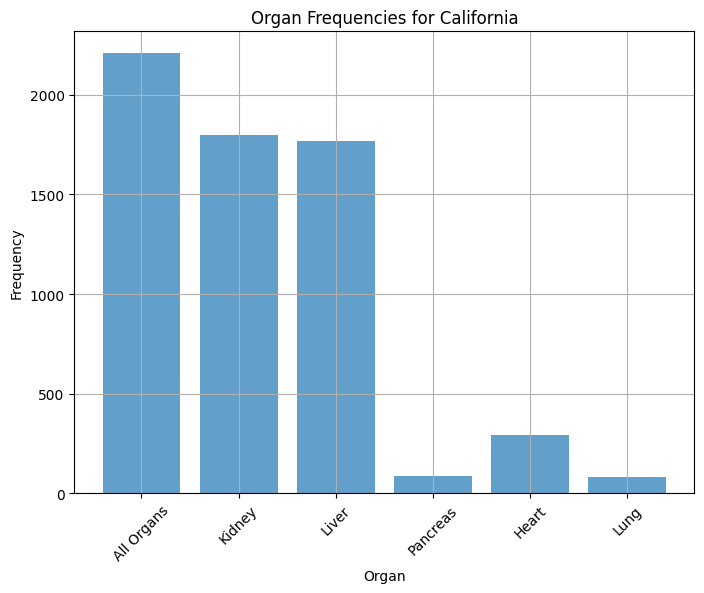

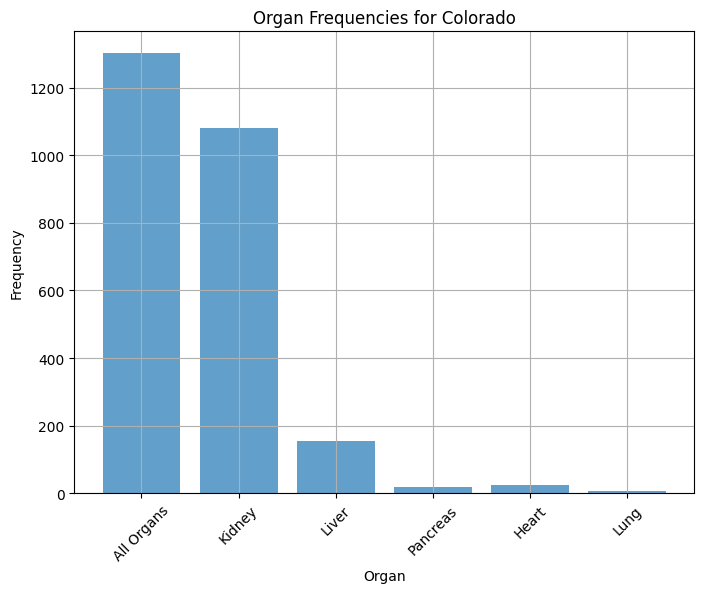

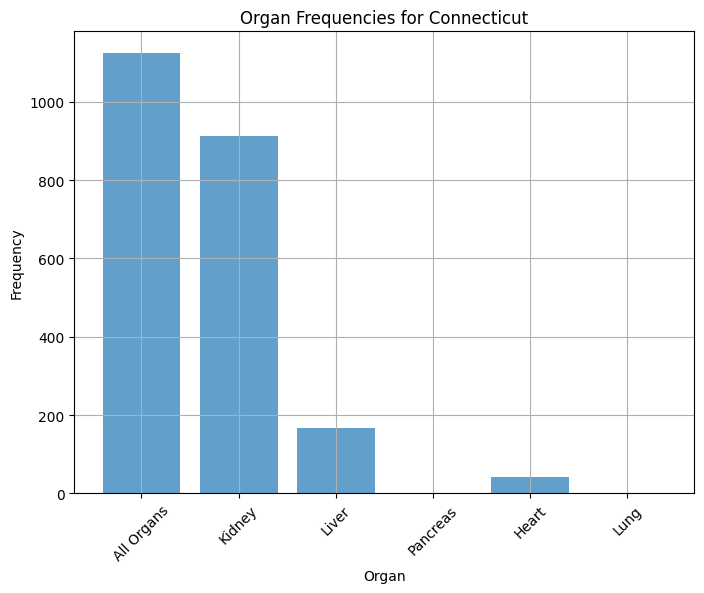

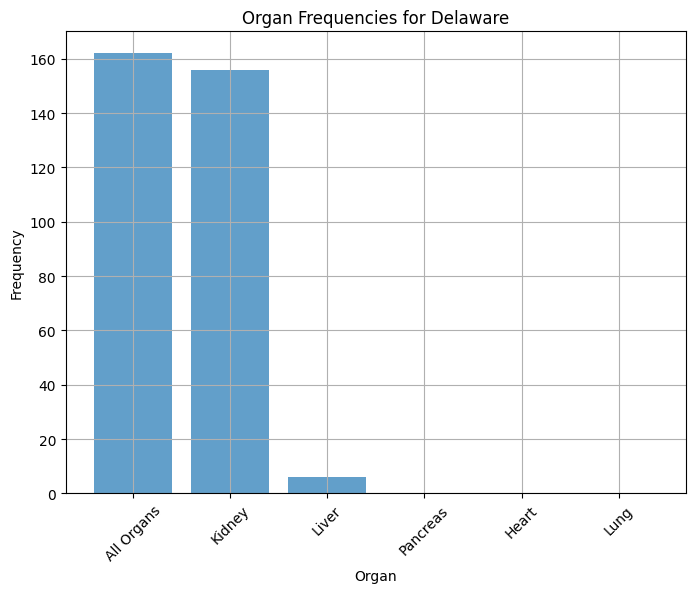

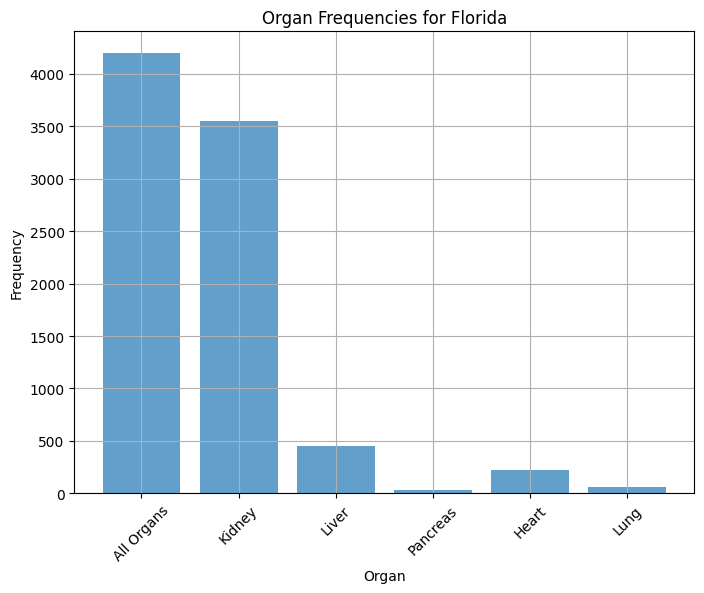

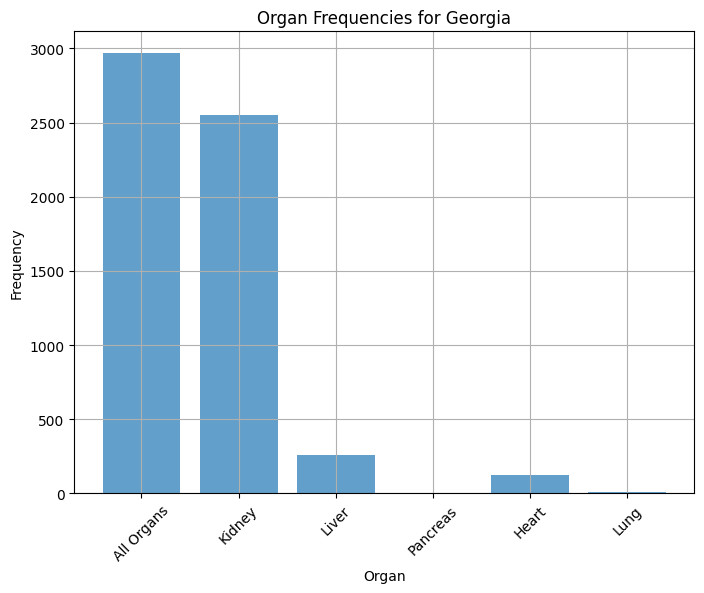

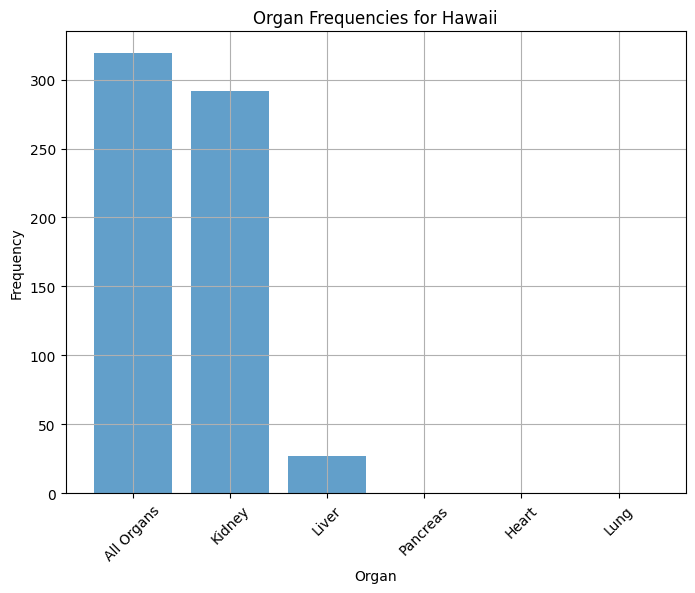

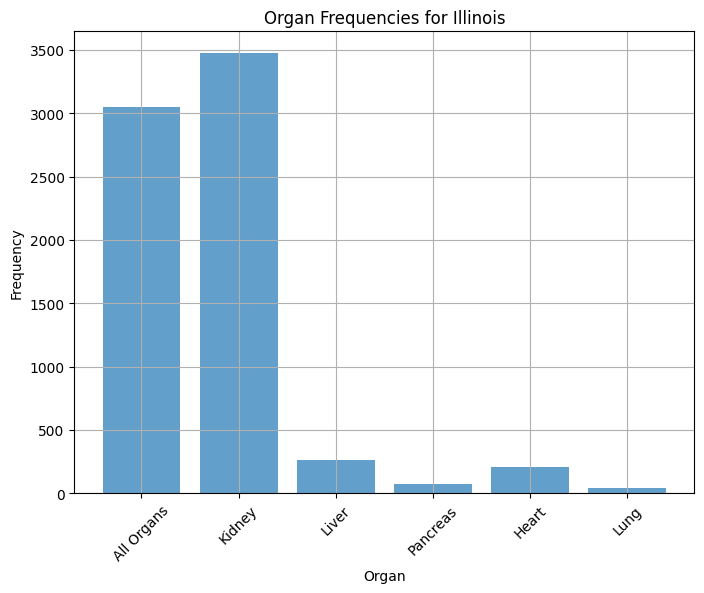

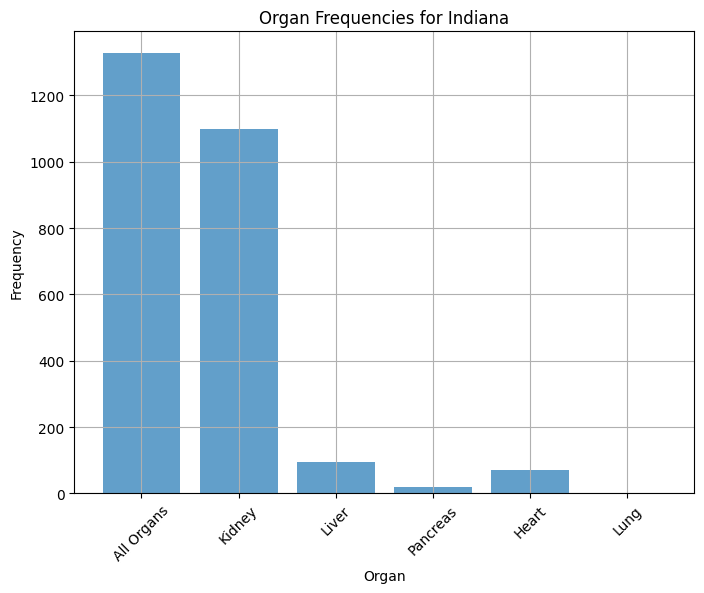

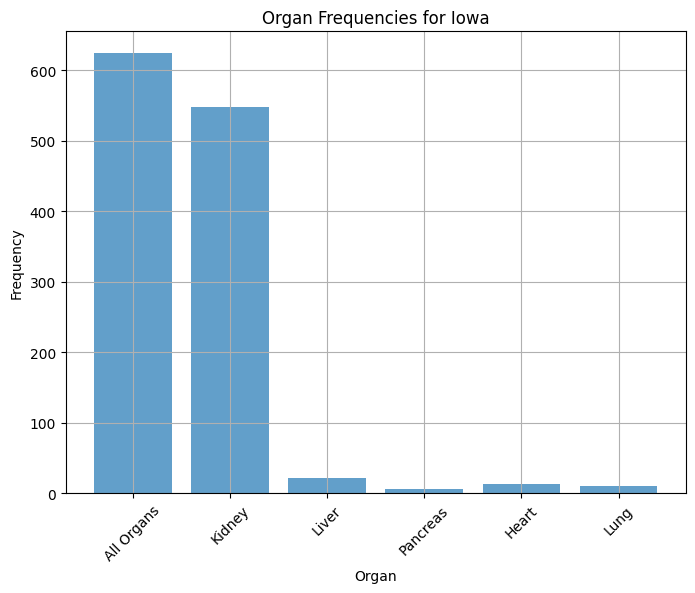

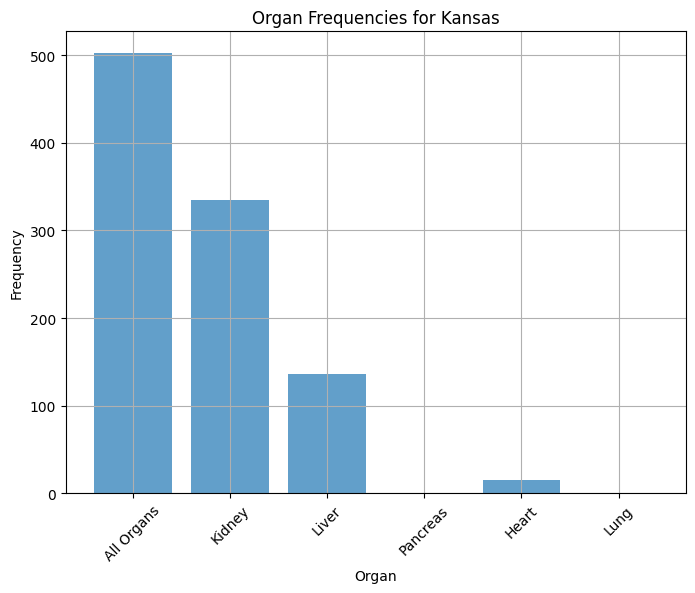

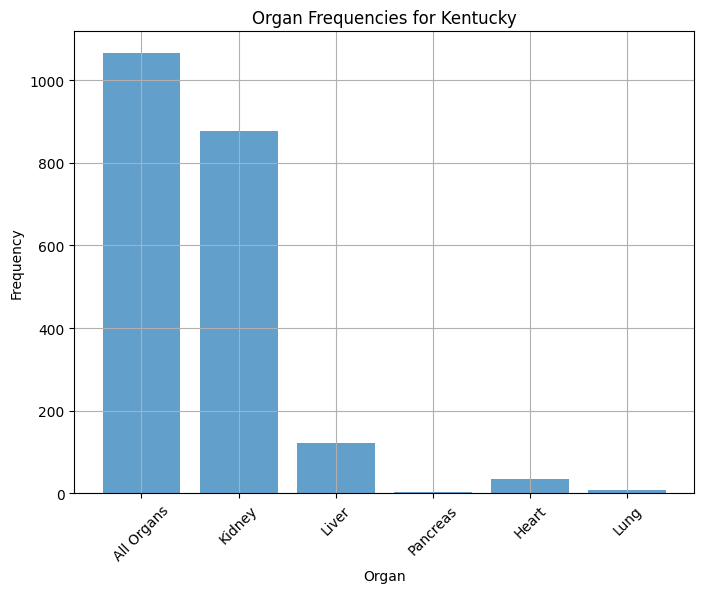

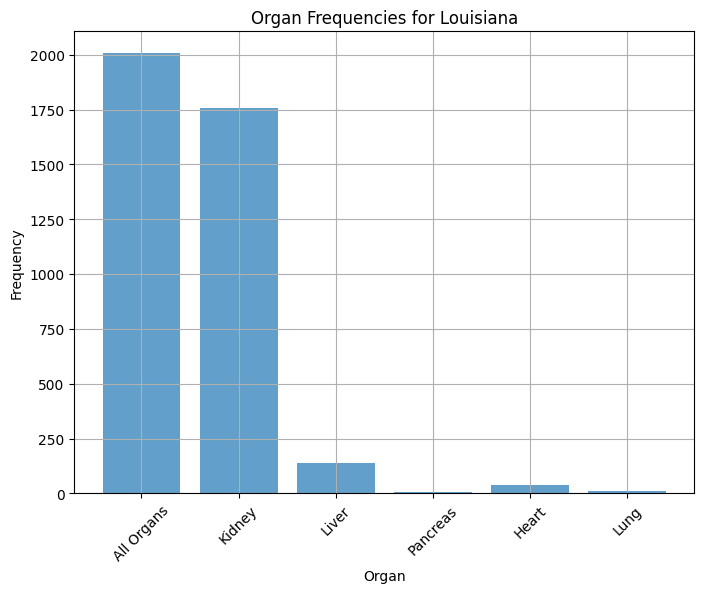

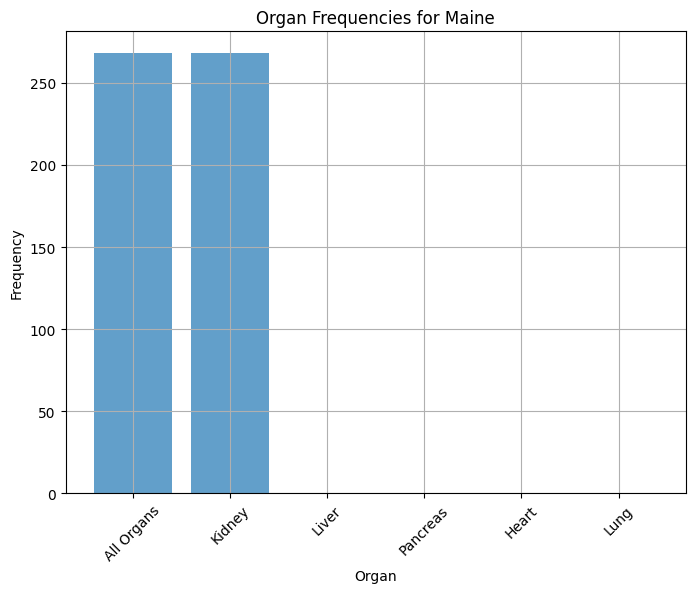

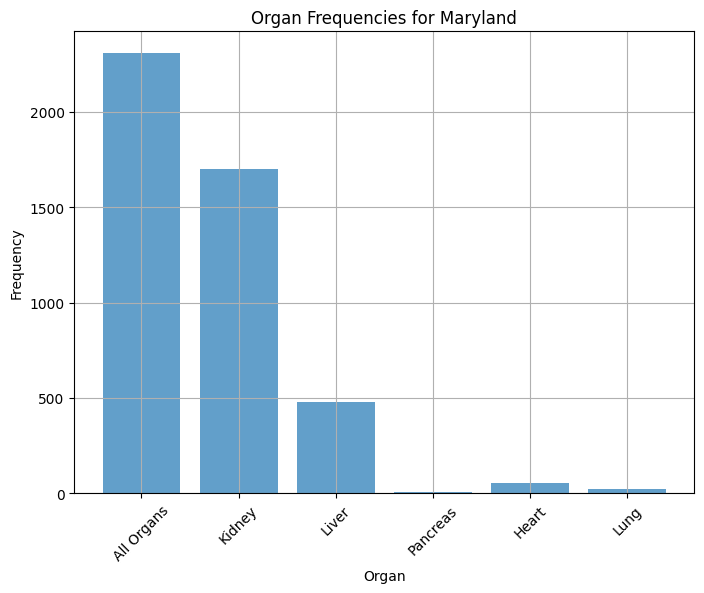

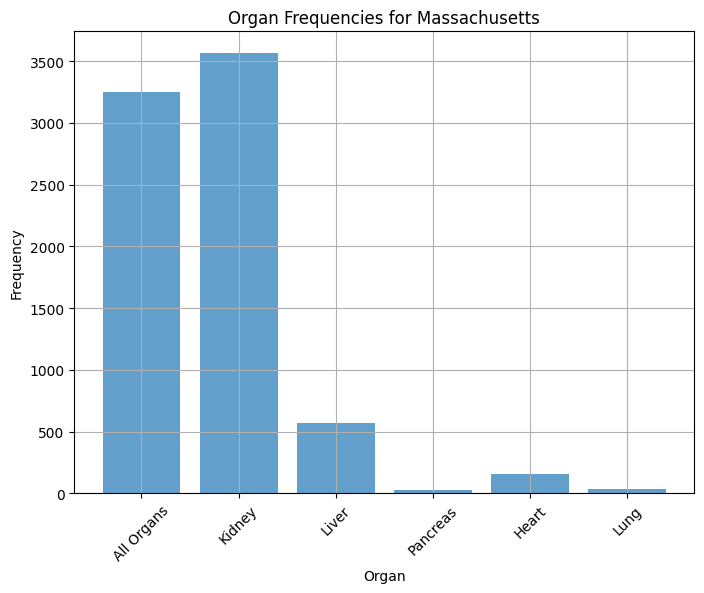

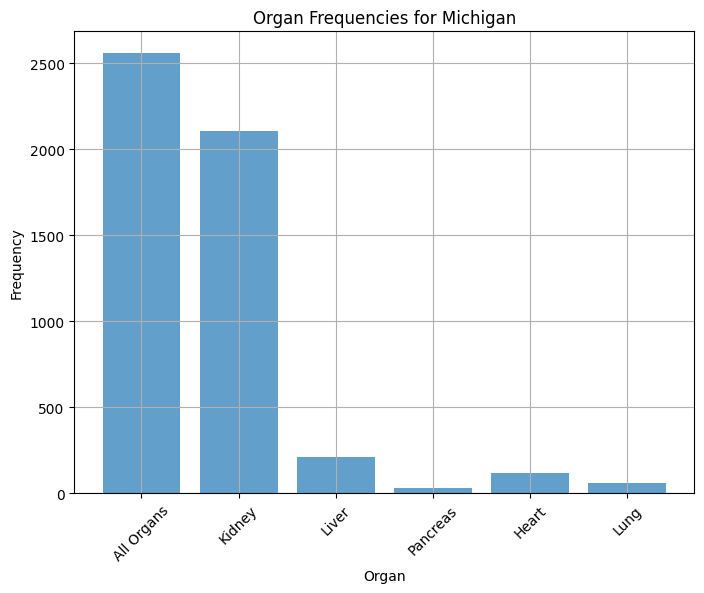

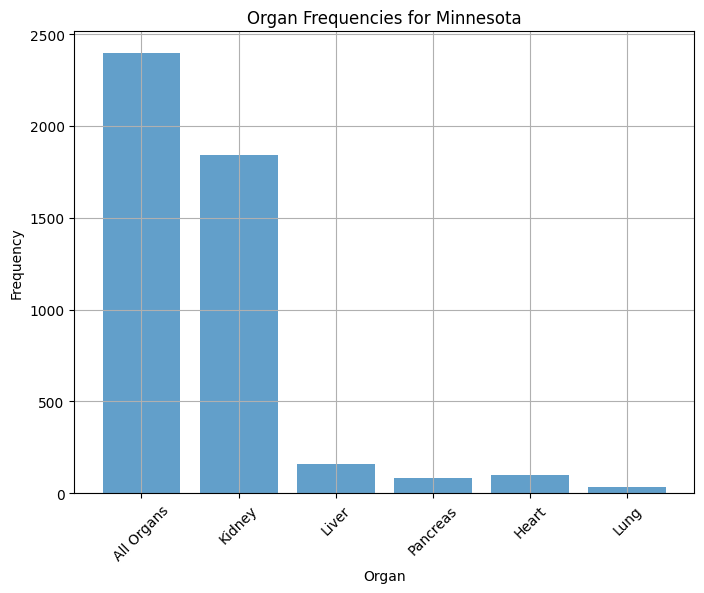

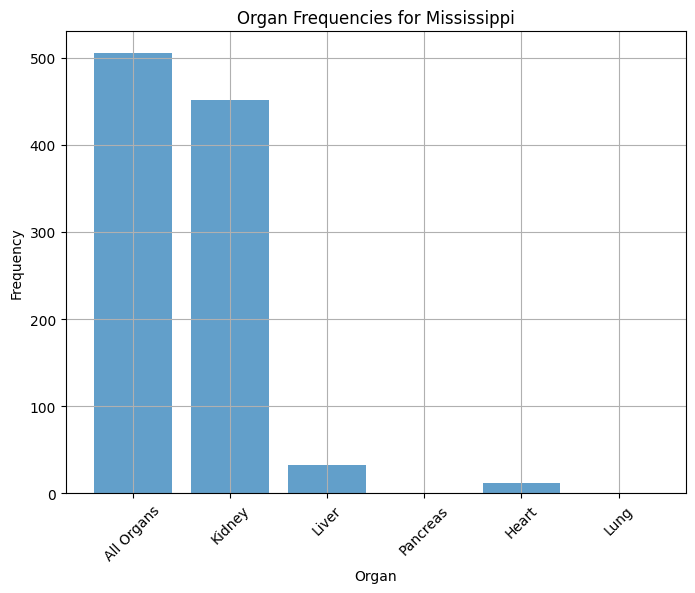

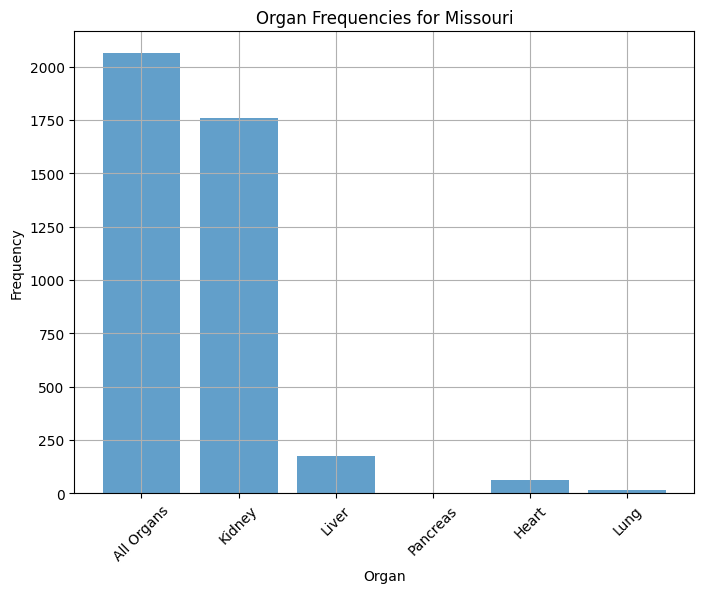

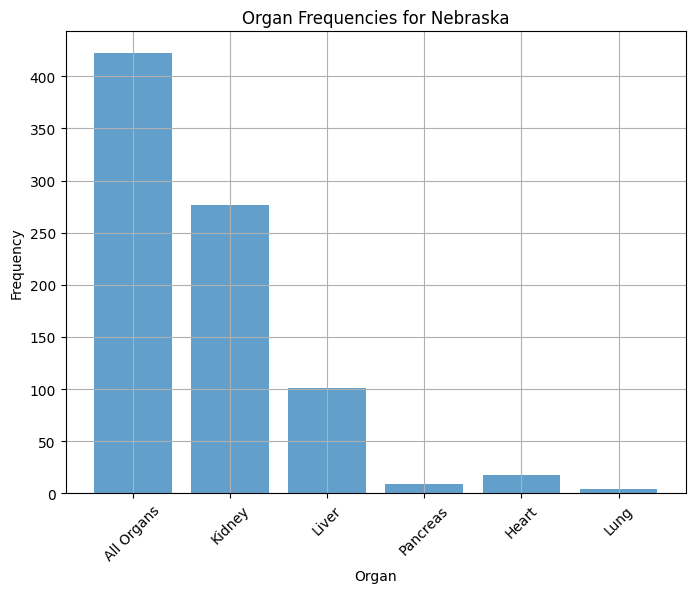

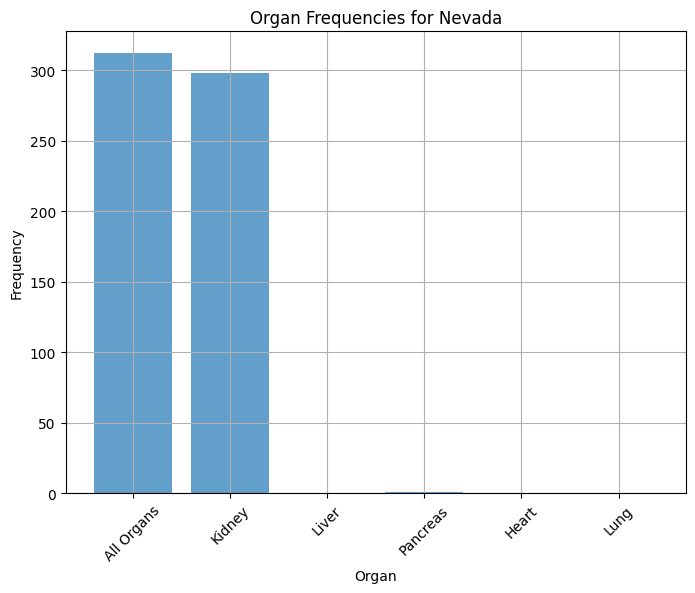

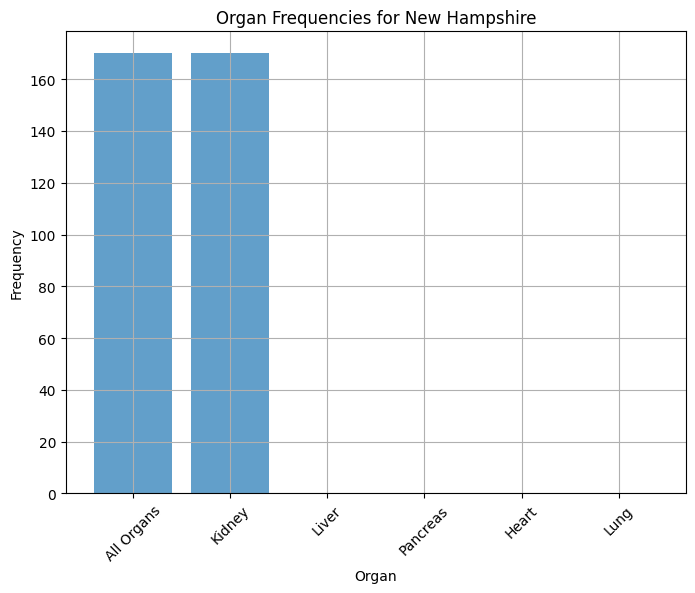

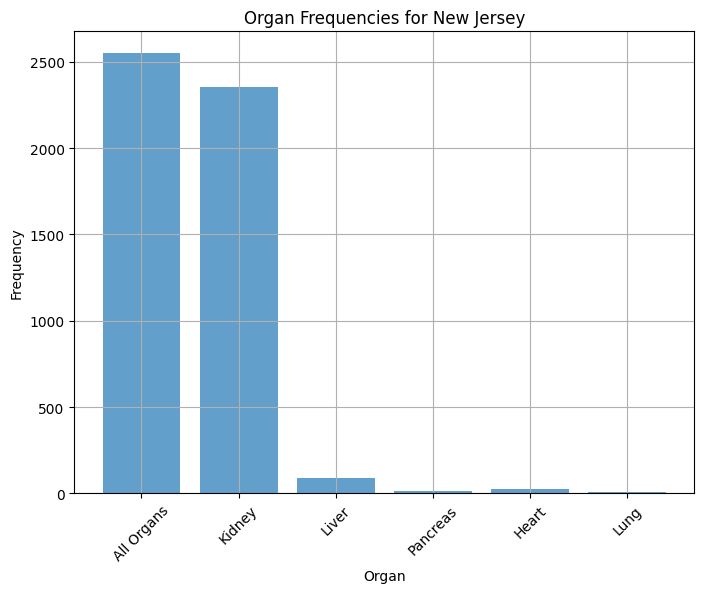

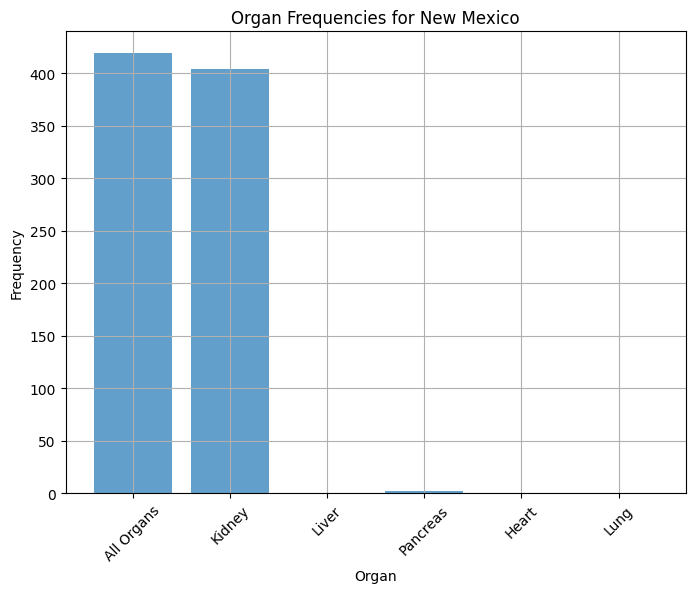

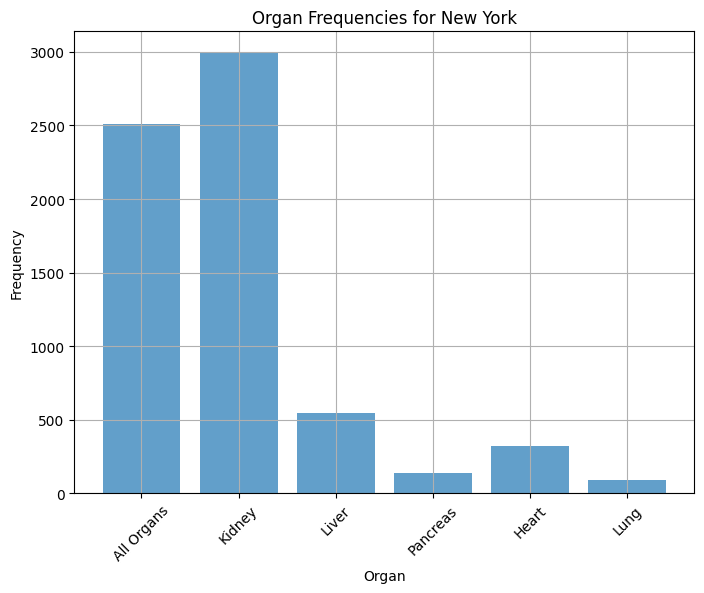

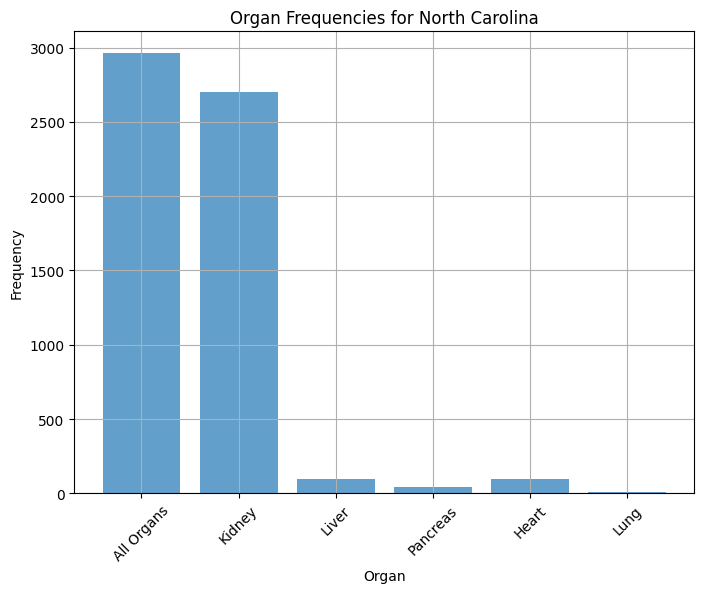

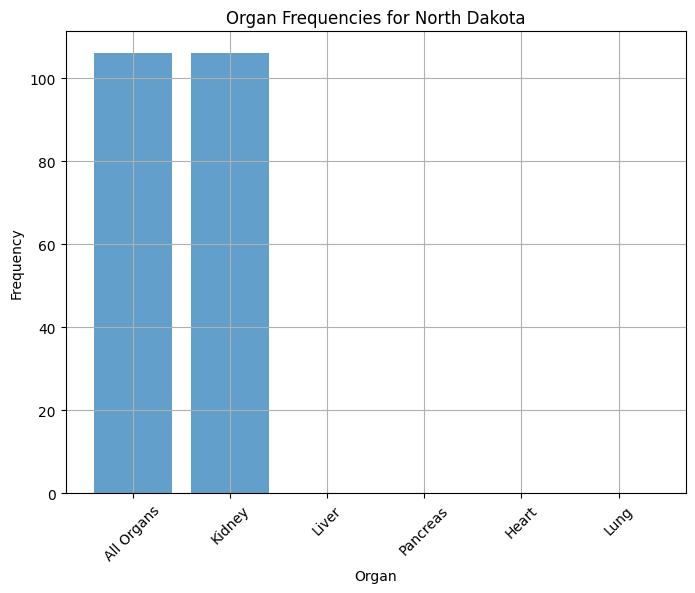

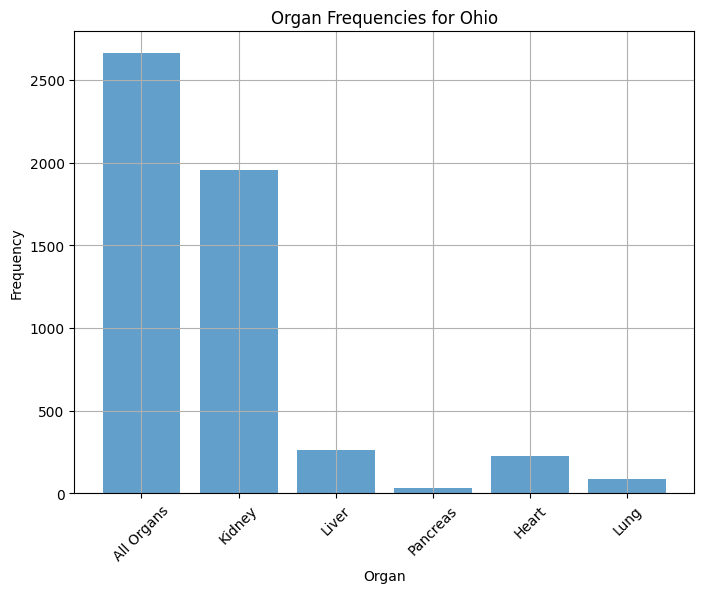

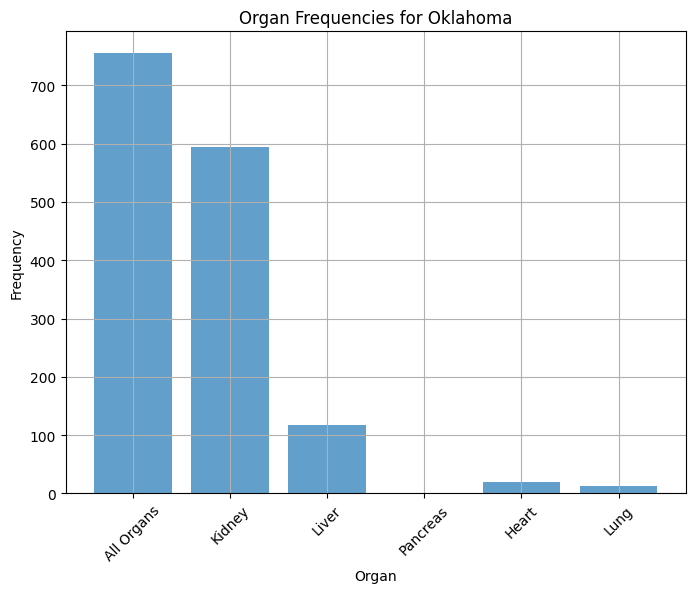

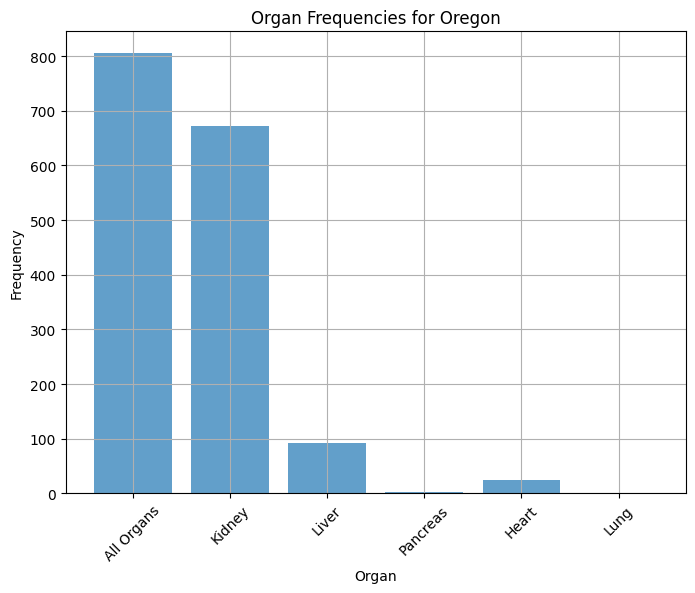

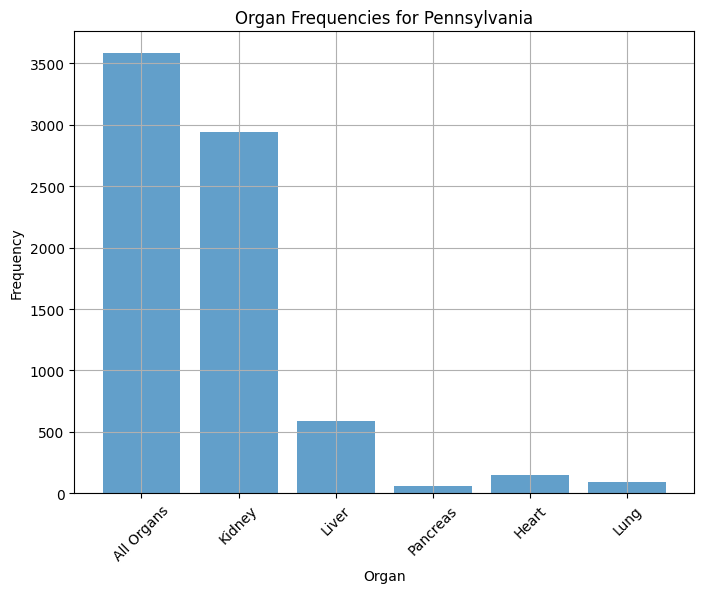

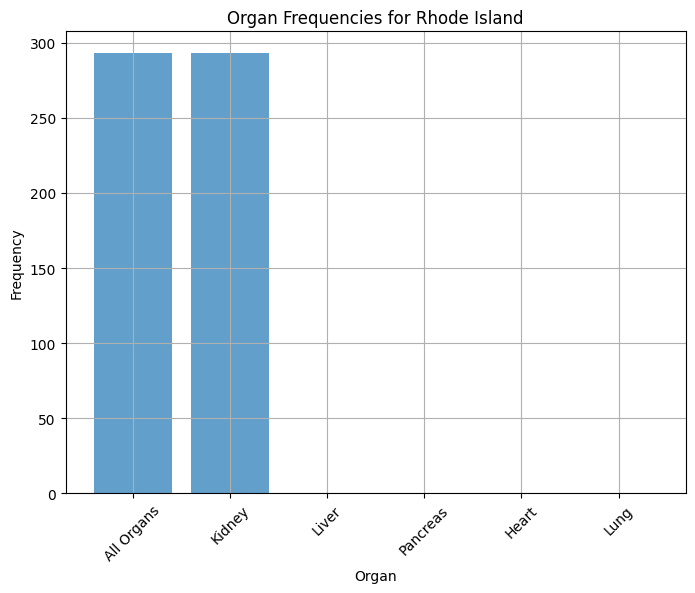

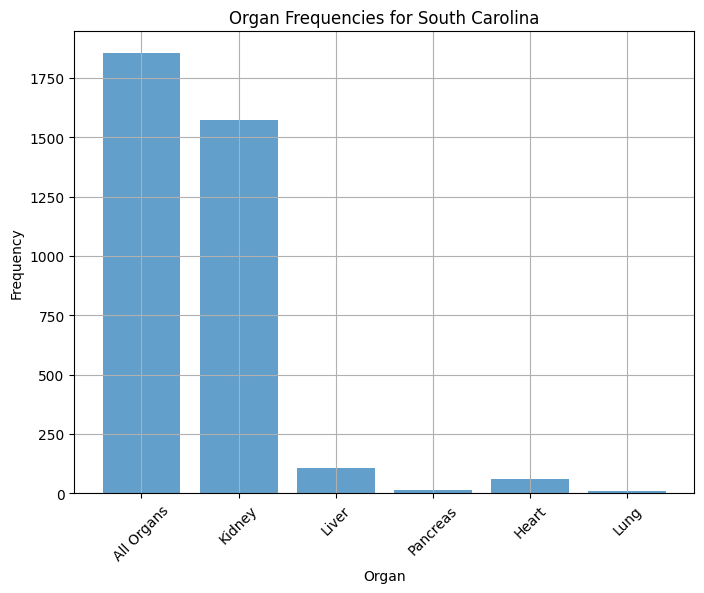

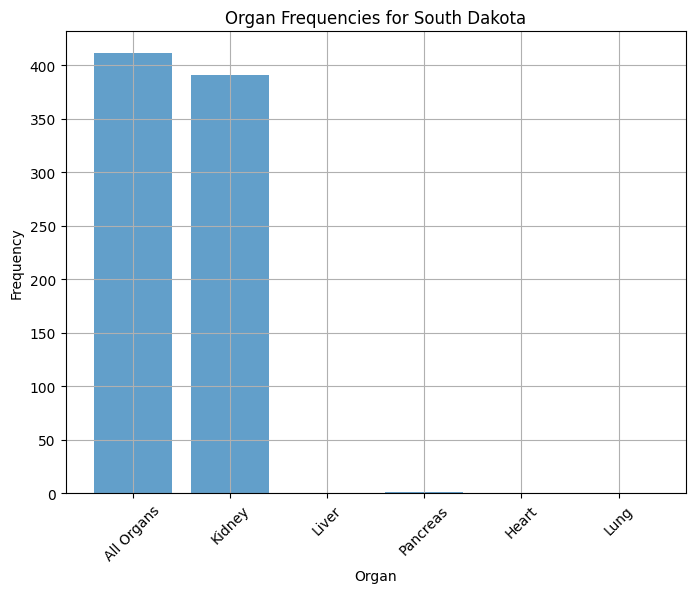

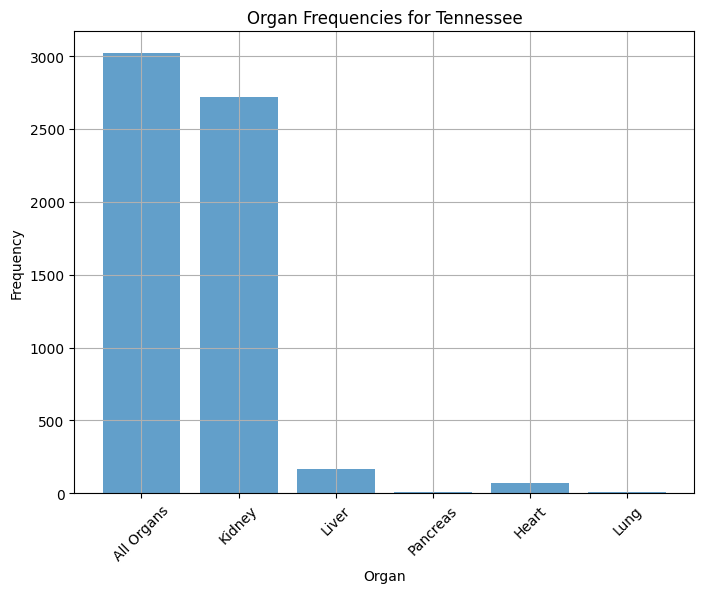

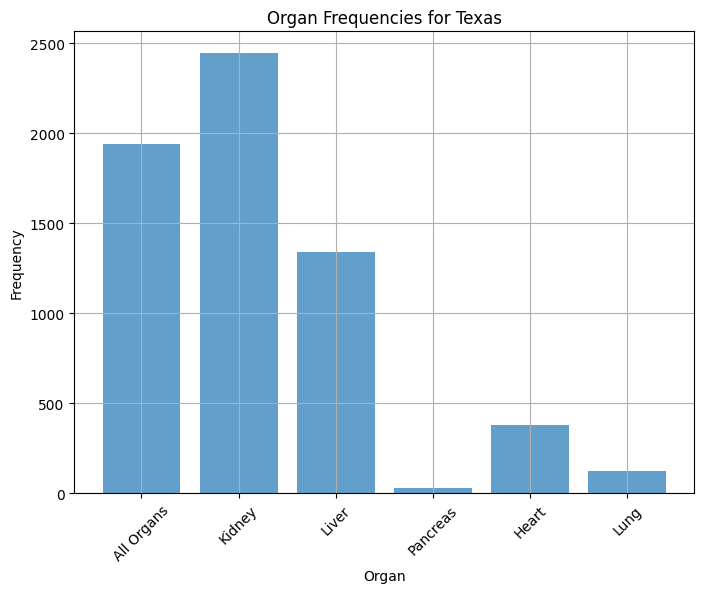

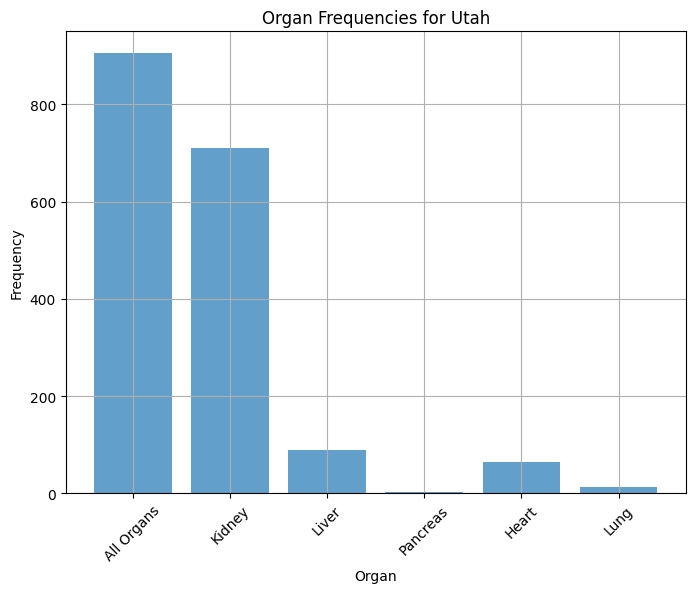

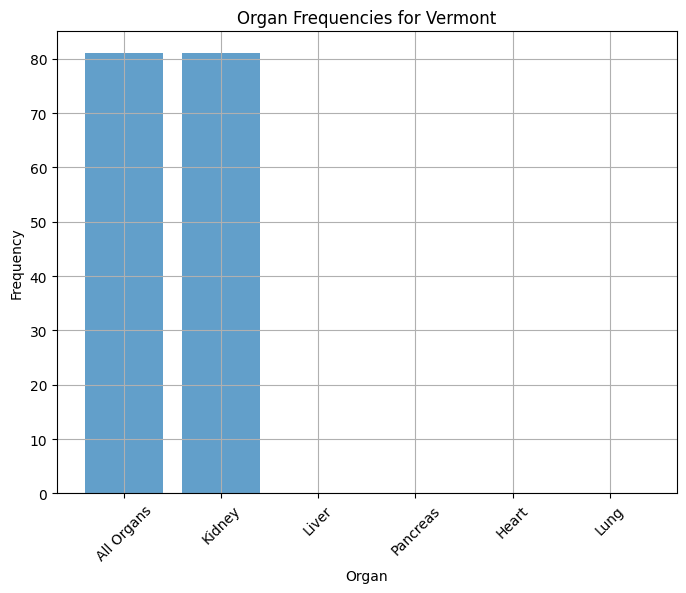

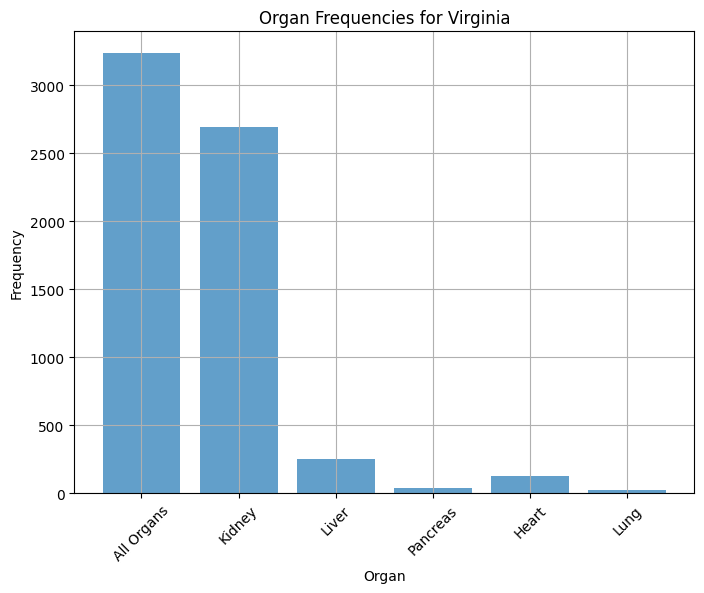

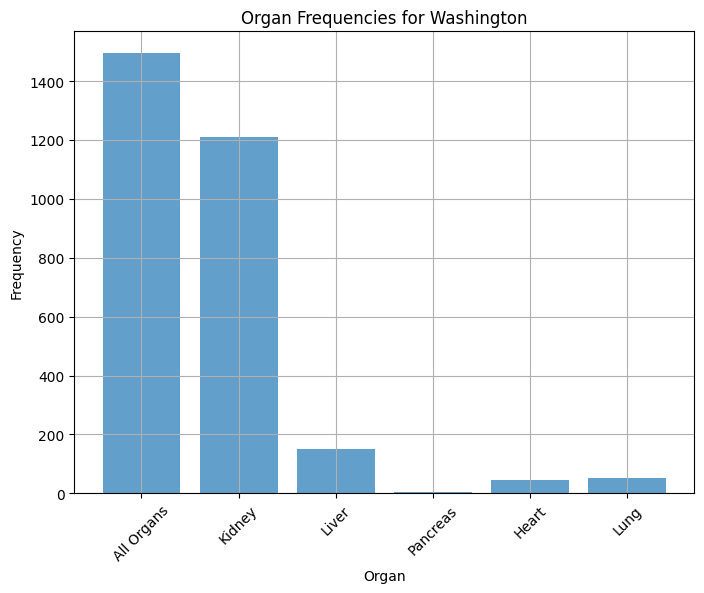

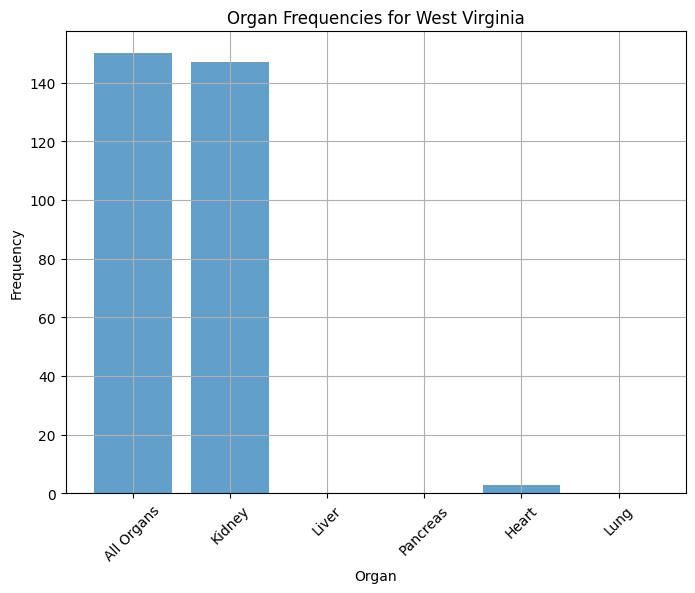

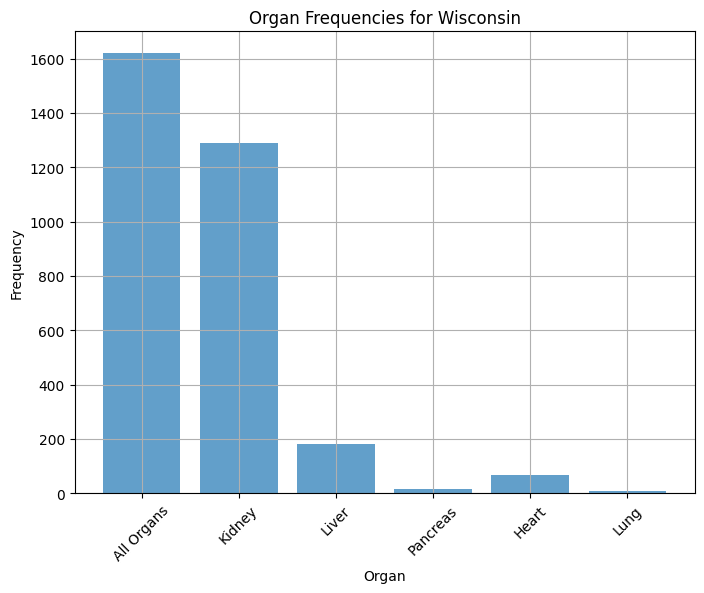

In [3]:


numeric_cols = [col for col in f.columns if col not in ['State', 'Age_Group', 'Gender']]

f[numeric_cols] = f[numeric_cols].apply(pd.to_numeric, errors='coerce')


state_organ_counts = f.groupby('State')[numeric_cols].sum()


for state in state_organ_counts.index:

    plt.figure(figsize=(8, 6))

    plt.bar(state_organ_counts.columns, state_organ_counts.loc[state], alpha=0.7)

    plt.title(f'Organ Frequencies for {state}')

    plt.xlabel('Organ')

    plt.ylabel('Frequency')

    plt.xticks(rotation=45)

    plt.grid(True)

    plt.show()

All Organs  Gender
1.0         M         24
            F         22
2.0         M         16
3.0         F         14
4.0         F         14
                      ..
113.0       F          1
114.0       M          1
117.0       M          1
118.0       M          1
978.0       M          1
Name: count, Length: 301, dtype: int64